In [9]:
# Load all packages
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Create dataframe
df = pd.read_csv("Datalab_Rit_Herkomst_Bestemming_Uur_20190403.csv", sep=";")

# Change column names
df.columns = ['Datum', 'UurgroepOmschrijving', 'VertrekHalteCode',
       'VertrekHalteNaam', 'VertrekLat', 'VertrekLon',
       'AankomstHalteCode', 'AankomstHalteNaam', 'AankomstLat',
       'AankomstLon', 'AantalRitten']
df = df.dropna()

In [14]:
df=df[df['VertrekHalteNaam'] == "Centraal Station"]

In [3]:
# Get all stations in a list
s1 = df['VertrekHalteNaam'].tolist()
s2 = df['AankomstHalteNaam'].tolist()

stations = set(s1 + s2)

# Create a dictionary of LonLat for every station
from collections import defaultdict
pos = defaultdict()

vertrekhaltes = df["VertrekHalteNaam"].tolist()
vertrekx = df["VertrekLat"].tolist()
vertreky = df["VertrekLon"].tolist()

for i in range(len(vertrekhaltes)):
    pos[vertrekhaltes[i]] = (vertrekx[i], vertreky[i])
    
aankomsthaltes = df["AankomstHalteNaam"].tolist()
aankomstx = df["AankomstLat"].tolist()
aankomsty = df["AankomstLon"].tolist()

for i in range(len(aankomsthaltes)):
    pos[aankomsthaltes[i]] = (aankomstx[i], aankomsty[i])

In [4]:
# Create graph
G = nx.Graph()

# Add all stations to graph
for station in stations:
    G.add_node(station)

# Create graph from DataFrame with edges
# G = nx.from_pandas_edgelist(df, "VertrekHalteCode", "AankomstHalteCode", "AantalRitten")

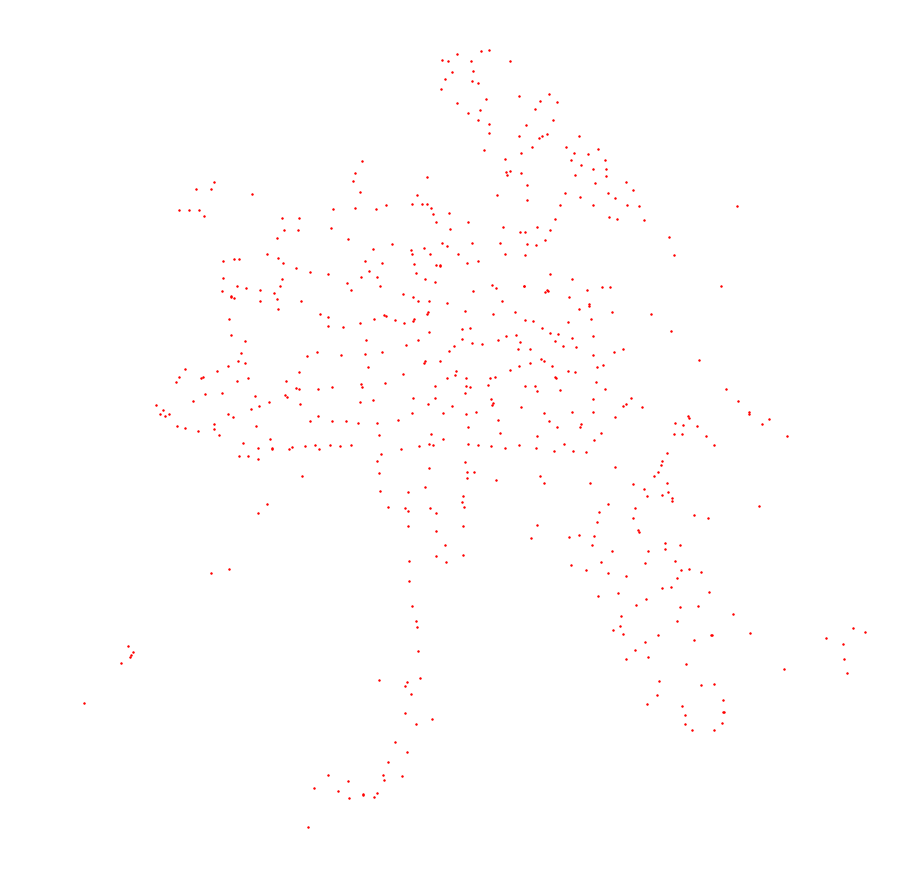

In [6]:
# Show graph
plt.figure(figsize=(12,12))
nx.draw(G, pos=pos, node_size=2)
plt.show()